In [1]:
import numpy as np
import pandas as pd 
from collections import Counter
from sklearn.model_selection import train_test_split
from scipy import sparse

Loading Dataset

In [2]:
ratings_df = pd.read_csv("C:/Users/ACER/Documents/Social Media Project/rating_data.data",sep='\t',names=["user_id","item_id","rating","timestamp"])

In [3]:
ratings_df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [4]:
ratings_df.shape

(100000, 4)

In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
ratings_df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
ratings_df = ratings_df.reset_index()[['user_id','item_id','rating']]
print(ratings_df.shape)

(100000, 3)


Distribution of ratings

In [8]:
import matplotlib.pyplot as plt

In [9]:
dictrat=Counter(ratings_df.rating)

<BarContainer object of 5 artists>

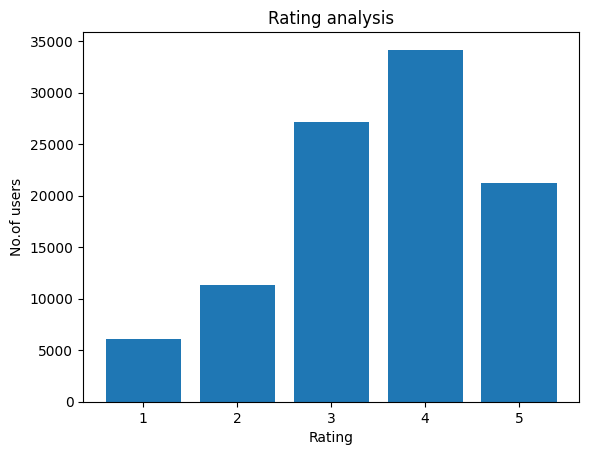

In [40]:
plt.title("Rating analysis")
plt.ylabel("No.of users")
plt.xlabel("Rating")
plt.bar(dictrat.keys(),dictrat.values())

Number of ratings per user

In [78]:
dictrat=Counter(ratings_df.groupby(['user_id']).count()['item_id'])
#plt.bar(dictrat.keys(),dictrat.values())
print(dictrat)

Counter({20: 32, 21: 24, 22: 23, 24: 21, 23: 21, 26: 19, 25: 16, 27: 16, 33: 16, 28: 15, 30: 14, 51: 12, 29: 12, 47: 12, 35: 11, 43: 10, 58: 10, 38: 9, 32: 9, 53: 9, 34: 8, 36: 8, 41: 8, 57: 8, 39: 8, 37: 8, 42: 8, 75: 8, 44: 8, 31: 8, 62: 7, 64: 7, 46: 7, 71: 7, 40: 7, 54: 6, 59: 6, 48: 6, 107: 6, 121: 6, 66: 6, 56: 6, 65: 6, 55: 6, 63: 6, 49: 6, 98: 5, 68: 5, 93: 5, 45: 5, 50: 5, 81: 5, 102: 5, 135: 5, 181: 4, 104: 4, 183: 4, 106: 4, 154: 4, 80: 4, 168: 4, 76: 4, 67: 4, 133: 4, 74: 4, 115: 4, 105: 4, 124: 4, 150: 4, 147: 4, 127: 4, 89: 4, 149: 4, 109: 4, 73: 4, 108: 4, 184: 3, 79: 3, 52: 3, 187: 3, 232: 3, 137: 3, 155: 3, 216: 3, 143: 3, 86: 3, 206: 3, 120: 3, 112: 3, 118: 3, 110: 3, 159: 3, 83: 3, 185: 3, 245: 3, 142: 3, 70: 3, 162: 3, 204: 3, 101: 3, 236: 3, 217: 3, 60: 3, 100: 3, 166: 3, 148: 3, 175: 2, 211: 2, 140: 2, 277: 2, 128: 2, 151: 2, 221: 2, 208: 2, 131: 2, 82: 2, 72: 2, 288: 2, 388: 2, 278: 2, 136: 2, 111: 2, 92: 2, 61: 2, 69: 2, 273: 2, 251: 2, 305: 2, 96: 2, 132: 2, 14

In [79]:
ft=dictrat.nlargest(10)  
type(ft)

AttributeError: 'Counter' object has no attribute 'nlargest'

In [63]:
ft

user_id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
Name: item_id, dtype: int64

<BarContainer object of 10 artists>

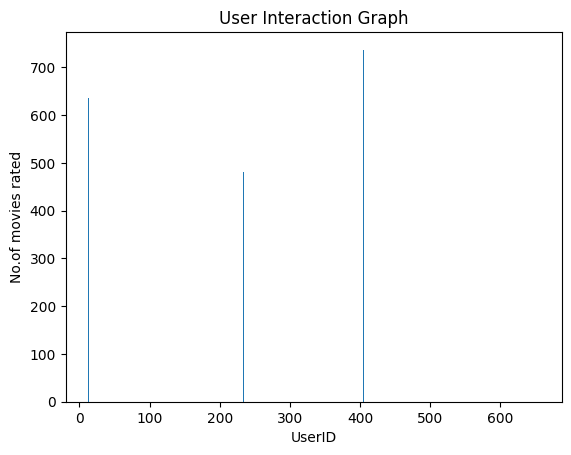

In [69]:
interac=pd.DataFrame({'user_id':ft.index,'count':ft.values})
plt.title("User Interaction Graph")
plt.ylabel("No.of movies rated")
plt.xlabel("UserID")
plt.bar(interac['user_id'],interac['count'])

Train-Test split

In [10]:
train_df, valid_df = train_test_split(ratings_df, test_size=0.2)

#resetting indices to avoid indexing errors in the future
train_df = train_df.reset_index()[['user_id', 'item_id', 'rating']]
valid_df = valid_df.reset_index()[['user_id', 'item_id', 'rating']]

Training

In [11]:
def encode_column(column):
    """ Encodes a pandas column with continous IDs"""
    keys = column.unique()
    key_to_id = {key:idx for idx,key in enumerate(keys)}
    return key_to_id, np.array([key_to_id[x] for x in column]), len(keys)

In [12]:
def encode_df(ratings_df):
    """Encodes rating data with continuous user and movie ids"""
    
    item_ids, ratings_df['item_id'], num_items = encode_column(ratings_df['item_id'])
    user_ids, ratings_df['user_id'], num_users = encode_column(ratings_df['user_id'])
    return ratings_df, num_users, num_items, user_ids, item_ids

In [13]:
ratings_df, num_users, num_items, user_ids, item_ids = encode_df(train_df)
print("Number of users :", num_users)
print("Number of Movies :", num_items)
ratings_df.head()

Number of users : 943
Number of Movies : 1653


,user_id,item_id,rating
0,0,0,4
1,1,1,5
2,2,2,4
3,3,3,5
4,4,4,3


Initializing user and item embeddings

In [38]:
def create_embeddings(n, K): #Function to add embeddings
    """
    Creates a random numpy matrix of shape n, K with uniform values in (0, 6/K)
    n: number of items/users
    K: number of factors in the embedding 
    """
    return 6*np.random.random((n, K)) / K

In [39]:
np.random.random((num_users,3)).shape

(943, 3)

In [40]:
def create_sparse_matrix(df, rows, cols, column_name="rating"): #Sparse matrix
    """ Returns a sparse utility matrix""" 
    return sparse.csc_matrix((df[column_name].values,(df['user_id'].values, df['item_id'].values)),shape=(rows, cols))

Creating Sparse Matrix

In [41]:
ratings_df, num_users, num_items, user_ids, item_ids = encode_df(train_df)
Y = create_sparse_matrix(ratings_df, num_users, num_items)

In [42]:
# to view matrix
Y.todense()

matrix([[4, 0, 0, ..., 0, 0, 0],
        [0, 5, 0, ..., 0, 0, 0],
        [0, 0, 4, ..., 0, 4, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
sparse_MAT=Y.todense()
sparse_MAT.shape

(943, 1653)

Making predictions

In [44]:
def predict(df, emb_user, emb_item):
    """ This function computes df["prediction"] without doing (U*V^T).
    
    Computes df["prediction"] by using elementwise multiplication of the corresponding embeddings and then 
    sum to get the prediction u_i*v_j. This avoids creating the dense matrix U*V^T.
    """
    df['prediction'] = np.sum(np.multiply(emb_item[df['item_id']],emb_user[df['user_id']]), axis=1)
    return df

In [45]:
lmbda = 0.0002

In [46]:
def cost(df, emb_user, emb_item):
    """ Computes mean square error"""
    Y = create_sparse_matrix(df, emb_user.shape[0], emb_item.shape[0])
    predicted = create_sparse_matrix(predict(df, emb_user, emb_item), emb_user.shape[0], emb_item.shape[0], 'prediction')
    return np.sum((Y-predicted).power(2))/df.shape[0] 

Gradient Descent

In [47]:
def gradient(df, emb_user, emb_item):
    """ Computes the gradient for user and movie embeddings"""
    Y = create_sparse_matrix(df, emb_user.shape[0], emb_item.shape[0])
    predicted = create_sparse_matrix(predict(df, emb_user, emb_item), emb_user.shape[0], emb_item.shape[0], 'prediction')
    delta =(Y-predicted)
    grad_user = (-2/df.shape[0])*(delta*emb_item) + 2*lmbda*emb_user
    grad_item = (-2/df.shape[0])*(delta.T*emb_user) + 2*lmbda*emb_item
    return grad_user, grad_item

In [48]:
def gradient_descent(df, emb_user, emb_item, iterations=2000, learning_rate=0.01, df_val=None):
    """ 
    Computes gradient descent with momentum (0.9) for given number of iterations.
    emb_user: the trained user embedding
    emb_item: the trained item embedding
    """
    Y = create_sparse_matrix(df, emb_user.shape[0], emb_item.shape[0])
    beta = 0.9
    grad_user, grad_item = gradient(df, emb_user, emb_item)
    v_user = grad_user
    v_item = grad_item
    for i in range(iterations):
        grad_user, grad_item = gradient(df, emb_user, emb_item)
        v_user = beta*v_user + (1-beta)*grad_user
        v_item = beta*v_item + (1-beta)*grad_item
        emb_user = emb_user - learning_rate*v_user
        emb_item = emb_item - learning_rate*v_item
        if(not (i+1)%50):
            print("\niteration", i+1, ":")
            print("train mse:",  cost(df, emb_user, emb_item))
            if df_val is not None:
                print("validation mse:",  cost(df_val, emb_user, emb_item))
    return emb_user, emb_item

In [49]:
emb_user = create_embeddings(num_users, 3)
emb_item = create_embeddings(num_items, 3)
emb_user, emb_item = gradient_descent(ratings_df, emb_user, emb_item, iterations=800, learning_rate=1)


iteration 50 :
train mse: 2.044710666493558

iteration 100 :
train mse: 1.5398149433697315

iteration 150 :
train mse: 1.318586484927568

iteration 200 :
train mse: 1.1975508033977487

iteration 250 :
train mse: 1.1228542089363494

iteration 300 :
train mse: 1.073428004721921

iteration 350 :
train mse: 1.039268834229803

iteration 400 :
train mse: 1.0149741468284927

iteration 450 :
train mse: 0.9973565889082107

iteration 500 :
train mse: 0.984413999854973

iteration 550 :
train mse: 0.9748294658295996

iteration 600 :
train mse: 0.9677059588797651

iteration 650 :
train mse: 0.9624154285022476

iteration 700 :
train mse: 0.9585082445198474

iteration 750 :
train mse: 0.9556565002725321

iteration 800 :
train mse: 0.9536172820322701


Making predictions on new data

In [50]:
def encode_new_data(valid_df, user_ids, item_ids):
    """ Encodes valid_df with the same encoding as train_df.
    """
    df_val_chosen = valid_df['item_id'].isin(item_ids.keys()) & valid_df['user_id'].isin(user_ids.keys())
    valid_df = valid_df[df_val_chosen]
    valid_df['item_id'] =  np.array([item_ids[x] for x in valid_df['item_id']])
    valid_df['user_id'] = np.array([user_ids[x] for x in valid_df['user_id']])
    return valid_df

In [51]:
print("before encoding:", valid_df.shape)
valid_df = encode_new_data(valid_df, user_ids, item_ids)
print("after encoding:", valid_df.shape)

before encoding: (19961, 4)
after encoding: (19961, 4)


Mean Square Error

In [52]:
train_mse = cost(train_df, emb_user, emb_item)
val_mse = cost(valid_df, emb_user, emb_item)
print(train_mse, val_mse)

0.9536172820322701 2.091379679093008


In [55]:
valid_df[valid_df.user_id==790].sort_values(by='prediction',ascending=False).head(5)

,user_id,item_id,rating,prediction
18939,790,739,4,3.813608
14890,790,153,3,3.785895
15730,790,864,4,3.608595
5499,790,157,2,3.599091
8509,790,215,2,3.579619


In [54]:
valid_df

,user_id,item_id,rating,prediction
0,837,535,1,2.062217
1,495,168,5,2.837400
2,798,142,3,3.180147
3,303,418,4,4.040369
4,270,83,4,2.467163
...,...,...,...,...
19995,914,781,5,2.563494
19996,892,181,4,3.237913
19997,474,1286,2,2.368238
19998,23,603,4,2.732455
